# Solving Linear Systems: 3 variables

In this lab, you will keep developing your skills using Python to solve systems of linear equations. In this notebook you will:

- Use `NumPy` linear algebra package to find the solutions to the system of linear equations
- Perform row reduction to bring matrix into row echelon form
- Find the solution for the system of linear equations using row reduced matrix
- Evaluate the determinant of the matrix to see again the connection between matrix singularity and the number of solutions of the linear system

# Table of Contents
- [ 1 - Representing and Solving a System of Linear Equations using Matrices](#1)
  - [ 1.1 - System of Linear Equations](#1.1)
  - [ 1.2 - Solving Systems of Linear Equations using Matrices](#1.2)
  - [ 1.3 - Evaluating the Determinant of a Matrix](#1.3)
- [ 2 - Solving System of Linear Equations using Row Reduction](#2)
  - [ 2.1 - Preparation for Row Reduction](#2.1)
  - [ 2.2 - Functions for Elementary Operations](#2.2)
  - [ 2.3 - Row Reduction and Solution of the Linear System](#2.3)
- [ 3 - System of Linear Equations with No Solutions](#3)
- [ 4 - System of Linear Equations with Infinite Number of Solutions](#4)

## Packages

Load the `NumPy` package to access its functions.

In [1]:
import numpy as np

<a name='1'></a>
## 1 - Representing and Solving a System of Linear Equations using Matrices

<a name='1.1'></a>
### 1.1 - System of Linear Equations

Here is a **system of linear equations** (or **linear system**) with three equations and three unknown variables:


$$
\begin{cases} 
4x_1-3x_2+x_3=-10, \\ 2x_1+x_2+3x_3=0, \\ -x_1+2x_2-5x_3=17, 
\end{cases}
\tag{1}
$$

**To solve** this system of linear equations means to find such values of the variables $x_1$, $x_2$, $x_3$, that all of its equations are simultaneously satisfied.

<a name='1.2'></a>
### 1.2 - Solving Systems of Linear Equations using Matrices

Let's prepare to solve the linear system $(1)$ using `NumPy`. $A$ will be a matrix, each row will represent one equation in the system and each column will correspond to the variable $x_1$, $x_2$, $x_3$. And $b$ is a 1-D array of the free (right side) coefficients:

In [2]:
A = np.array([
        [4, -3, 1],
        [2, 1, 3],
        [-1, 2, -5]
    ], dtype=np.dtype(float))

b = np.array([-10, 0, 17], dtype=np.dtype(float))

print("Matrix A:")
print(A)
print("\nArray b:")
print(b)

Matrix A:
[[ 4. -3.  1.]
 [ 2.  1.  3.]
 [-1.  2. -5.]]

Array b:
[-10.   0.  17.]


Check the dimensions of $A$ and $b$ using `shape()` function:

In [3]:
print(f"Shape of A: {np.shape(A)}")
print(f"Shape of b: {np.shape(b)}")

Shape of A: (3, 3)
Shape of b: (3,)


Now use `np.linalg.solve(A, b)` function to find the solution of the system $(1)$. The result will be saved in the 1-D array $x$. The elements will correspond to the values of $x_1$, $x_2$ and $x_3$:

In [4]:
x = np.linalg.solve(A, b)

print(f"Solution: {x}")

Solution: [ 1.  4. -2.]


Try to substitute those values of $x_1$, $x_2$ and $x_3$ into the original system of equations to check its consistency.

<a name='1.3'></a>
### 1.3 - Evaluating the Determinant of a Matrix

Matrix $A$ corresponding to the linear system $(1)$ is a **square matrix** - it has the same number of rows and columns. In the case of a square matrix it is possible to calculate its determinant - a real number that characterizes some properties of the matrix. A linear system containing three equations with three unknown variables will have one solution if and only if the matrix $A$ has a non-zero determinant.

Let's calculate the determinant using `np.linalg.det(A)` function:

In [5]:
d = np.linalg.det(A)

print(f"Determinant of matrix A: {d:.2f}")

Determinant of matrix A: -60.00


Please, note that its value is non-zero, as expected.

<a name='2'></a>
## 2 - Solving System of Linear Equations using Row Reduction

<a name='2.1'></a>
### 2.1 - Preparation for Row Reduction

You can see how easy it is to use contemporary packages to solve linear equations. However, for a deeper understanding of mathematical concepts, it is important to practice some solution techniques manually. The programming approach can still help here to reduce the number of arithmetical calculations, and focus on the method itself.

Here you can practice the row reduction method for the linear system with three variables. To apply it, first, unify matrix $A$ and array $b$ into one matrix using `np.hstack()` function. Note that the shape of the originally defined array $b$ was $(3,)$, to stack it with the $(3, 3)$ matrix you need to transform it so that it has the same number of dimensions. You can use `.reshape((3, 1))` function:

In [6]:
A_system = np.hstack((A, b.reshape((3, 1))))

print(A_system)

[[  4.  -3.   1. -10.]
 [  2.   1.   3.   0.]
 [ -1.   2.  -5.  17.]]


<a name='2.2'></a>
### 2.2 - Functions for Elementary Operations

Let's review **elementary operations**, which do not change the solution set of a linear system:

- Multiply any row by a non-zero number
- Add two rows and exchange one of the original rows with the result of the addition
- Swap rows

In the case of larger systems you will need to apply elementary operations multiple times. Thus, it is convenient to define the corresponding Python functions. Investigate them in the following code cells with the examples:

In [7]:
# exchange row_num of the matrix M with its multiple by row_num_multiple
# Note: for simplicity, you can drop check if  row_num_multiple has non-zero value, which makes the operation valid
def MultiplyRow(M, row_num, row_num_multiple):
    # .copy() function is required here to keep the original matrix without any changes
    M_new = M.copy()
    M_new[row_num] = M_new[row_num] * row_num_multiple
    return M_new

print("Original matrix:")
print(A_system)
print("\nMatrix after its third row is multiplied by 2:")
# remember that indexing in Python starts from 0, thus index 2 will correspond to the third row
print(MultiplyRow(A_system, 2, 2))

Original matrix:
[[  4.  -3.   1. -10.]
 [  2.   1.   3.   0.]
 [ -1.   2.  -5.  17.]]

Matrix after its third row is multiplied by 2:
[[  4.  -3.   1. -10.]
 [  2.   1.   3.   0.]
 [ -2.   4. -10.  34.]]


In [8]:
# multiply row_num_1 by row_num_1_multiple and add it to the row_num_2, 
# exchanging row_num_2 of the matrix M in the result
def AddRows(M, row_num_1, row_num_2, row_num_1_multiple):
    M_new = M.copy()
    M_new[row_num_2] = row_num_1_multiple * M_new[row_num_1] + M_new[row_num_2]
    return M_new

print("Original matrix:")
print(A_system)
print("\nMatrix after exchange of the third row with the sum of itself and second row multiplied by 1/2:")
print(AddRows(A_system,1, 2, 1/2))

Original matrix:
[[  4.  -3.   1. -10.]
 [  2.   1.   3.   0.]
 [ -1.   2.  -5.  17.]]

Matrix after exchange of the third row with the sum of itself and second row multiplied by 1/2:
[[  4.   -3.    1.  -10. ]
 [  2.    1.    3.    0. ]
 [  0.    2.5  -3.5  17. ]]


In [9]:
# exchange row_num_1 and row_num_2 of the matrix M
def SwapRows(M, row_num_1, row_num_2):
    M_new = M.copy()
    M_new[[row_num_1, row_num_2]] = M_new[[row_num_2, row_num_1]]
    return M_new

print("Original matrix:")
print(A_system)
print("\nMatrix after exchange its first and third rows:")
print(SwapRows(A_system,0,2))

Original matrix:
[[  4.  -3.   1. -10.]
 [  2.   1.   3.   0.]
 [ -1.   2.  -5.  17.]]

Matrix after exchange its first and third rows:
[[ -1.   2.  -5.  17.]
 [  2.   1.   3.   0.]
 [  4.  -3.   1. -10.]]


<a name='2.3'></a>
### 2.3 - Row Reduction and Solution of the Linear System

Now you can use the defined operations to bring the matrix into row reduced form. To do this manually, it is convenient to have $1$ or $-1$ value in the first element of the first row (the arithmetics of operations is easier then). Performing calculations in Python, won't provide much of a benefit, but it is better to do that for illustration purposes. So, let's swap the first and third rows:

In [10]:
A_ref = SwapRows(A_system,0,2)
# Note: ref is an abbreviation of the row echelon form (row reduced form)
print(A_ref)

[[ -1.   2.  -5.  17.]
 [  2.   1.   3.   0.]
 [  4.  -3.   1. -10.]]


Now you would need to make such elementary operations, that the first elements in the second and third row become equal to zero:

In [11]:
# multiply row 0 of the new matrix A_ref by 2 and add it to the row 1
A_ref = AddRows(A_ref,0,1,2)
print(A_ref)

[[ -1.   2.  -5.  17.]
 [  0.   5.  -7.  34.]
 [  4.  -3.   1. -10.]]


In [12]:
# multiply row 0 of the new matrix A_ref by 4 and add it to the row 2
A_ref = AddRows(A_ref,0,2,4)
print(A_ref)

[[ -1.   2.  -5.  17.]
 [  0.   5.  -7.  34.]
 [  0.   5. -19.  58.]]


The next step will be to perform an operation by putting the second element in the third row equal to zero:

In [13]:
# multiply row 1 of the new matrix A_ref by -1 and add it to the row 2
A_ref = AddRows(A_ref,1,2,-1)
print(A_ref)

[[ -1.   2.  -5.  17.]
 [  0.   5.  -7.  34.]
 [  0.   0. -12.  24.]]


It is easy now to find the value of $x_3$ from the third row, as it corresponds to the equation $-12x_3=24$. Let's divide the row by -12:

In [14]:
# multiply row 2 of the new matrix A_ref by -1/12
A_ref = MultiplyRow(A_ref,2,-1/12)
print(A_ref)

[[-1.  2. -5. 17.]
 [ 0.  5. -7. 34.]
 [-0. -0.  1. -2.]]


Now the second row of the matrix corresponds to the equation $5x_2-7x_3=34$ and the first row to the equation $-x_1+2x_2-5x_3=17$. Referring to the elements of the matrix, you can find the values of $x_2$ and $x_1$:

In [15]:
x_3 = -2
x_2 = (A_ref[1,3] - A_ref[1,2] * x_3) / A_ref[1,1]
x_1 = (A_ref[0,3] - A_ref[0,2] * x_3 - A_ref[0,1] * x_2) / A_ref[0,0]

print(x_1, x_2, x_3)

1.0 4.0 -2


<a name='3'></a>
## 3 - System of Linear Equations with No Solutions

Given another system of linear equations:

$$\begin{cases} 
x_1+x_2+x_3=2, \\ x_2-3x_3=1, \\ 2x_1+x_2+5x_3=0, \end{cases}\tag{2}$$

let's find the determinant of the corresponding matrix.

In [16]:
A_2= np.array([
        [1, 1, 1],
        [0, 1, -3],
        [2, 1, 5]
    ], dtype=np.dtype(float))

b_2 = np.array([2, 1, 0], dtype=np.dtype(float))

d_2 = np.linalg.det(A_2)

print(f"Determinant of matrix A_2: {d_2:.2f}")

Determinant of matrix A_2: 0.00


It is equal to zero, thus the system cannot have one unique solution. It will have either infinitely many solutions or none. The consistency of it will depend on the free coefficients (right side coefficients). You can uncomment and run the code in the following cell to check that the `np.linalg.solve()` function will give an error due to singularity.

In [31]:
# x_2 = np.linalg.solve(A_2, b_2)

You can check the system for consistency using ranks, but this is out of scope here (you can review this topic following the [link](https://www.onlinemath4all.com/solving-system-of-linear-equations-by-rank-method.html)). For now you can perform elementary operations to see that this particular system has no solutions:

In [18]:
A_2_system = np.hstack((A_2, b_2.reshape((3, 1))))
print(A_2_system)

[[ 1.  1.  1.  2.]
 [ 0.  1. -3.  1.]
 [ 2.  1.  5.  0.]]


In [19]:
# multiply row 0 by -2 and add it to the row 1
A_2_ref = AddRows(A_2_system,0,2,-2)
print(A_2_ref)

[[ 1.  1.  1.  2.]
 [ 0.  1. -3.  1.]
 [ 0. -1.  3. -4.]]


In [20]:
# add row 1 of the new matrix A_2_ref to the row 2
A_2_ref = AddRows(A_2_ref,1,2,1)
print(A_2_ref)

[[ 1.  1.  1.  2.]
 [ 0.  1. -3.  1.]
 [ 0.  0.  0. -3.]]


The last row will correspond to the equation $0=-3$ which has no solution. Thus the whole linear system $(2)$ has no solution.

<a name='4'></a>
## 4 - System of Linear Equations with Infinite Number of Solutions

You can bring system $(2)$ to consistency by changing only the free coefficients:

$$\begin{cases} 
x_1+x_2+x_3=2, \\ x_2-3x_3=1, \\ 2x_1+x_2+5x_3=3. \end{cases}\tag{3}$$

Define the new array of free coefficients:

In [21]:
b_3 = np.array([2, 1, 3])

Prepare the new matrix, corresponding to the system $(3)$:

In [22]:
A_3_system = np.hstack((A_2, b_3.reshape((3, 1))))
print(A_3_system)

[[ 1.  1.  1.  2.]
 [ 0.  1. -3.  1.]
 [ 2.  1.  5.  3.]]


In [23]:
# multiply row 0 of the new matrix A_3_system by -2 and add it to the row 2
A_3_ref = AddRows(A_3_system,0,2,-2)
print(A_3_ref)

[[ 1.  1.  1.  2.]
 [ 0.  1. -3.  1.]
 [ 0. -1.  3. -1.]]


In [24]:
# add row 1 of the new matrix A_3_ref to the row 2
A_3_ref = AddRows(A_3_ref,1,2,1)
print(A_3_ref)

[[ 1.  1.  1.  2.]
 [ 0.  1. -3.  1.]
 [ 0.  0.  0.  0.]]


Thus from the corresponding linear system

$$\begin{cases} 
x_1+x_2+x_3=2, \\ x_2-3x_3=1, \\ 0=0, \end{cases}\tag{4}$$

you can find that $x_2=1+3x_3$, substitute it into the first equation and find $x_1$. Thus the solutions of the linear system $(3)$ are:

$$\begin{cases} 
x_1=1-4x_3, \\ x_2=1+3x_3, \end{cases}\tag{5}$$

where $x_3$ is any real number.

Well done! You used the `NumPy` functions to solve a system of equations and also got more experience in solving it manually. As expected, using a predefined function is much easier, but gives much less insight into what is happening under the hood. Remember that `np.linalg.solve` gives an error if there are no or infinitely many solutions, thus when implementing it you will have to think carefully so not to make your program crash.

In [25]:
from plot import plot_lines

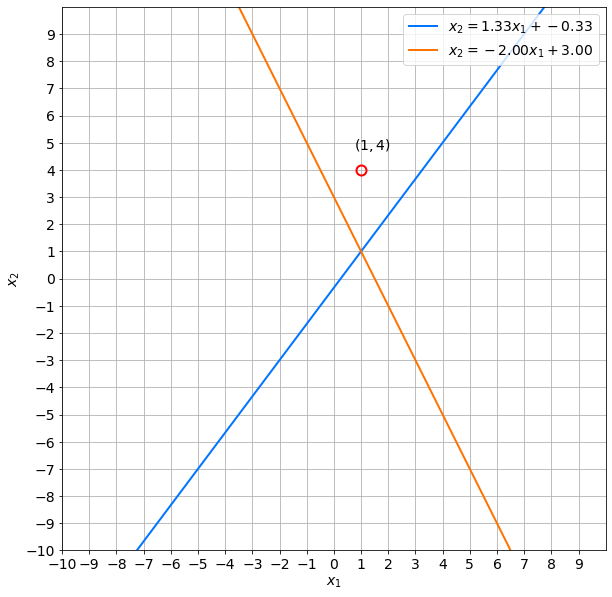

In [26]:
plot_lines(A_system)

In [42]:
Q_1 = np.array([
        [7, 5, 3],
        [3, 2, 5],
        [1, 2, 1]
    ], dtype=np.dtype(int))

qb_1 = np.array([120, 70, 20], dtype=np.dtype(int))

In [43]:
np.linalg.solve(Q_1, qb_1)

array([1.50000000e+01, 8.63506797e-16, 5.00000000e+00])

In [44]:
Q_system = np.hstack((Q_1, qb_1.reshape((3, 1))))

In [45]:
Q_system

array([[  7,   5,   3, 120],
       [  3,   2,   5,  70],
       [  1,   2,   1,  20]])

In [46]:
np.linalg.det(Q_1)

-34.00000000000001

In [47]:
np.linalg.matrix_rank(Q_1)

3

In [49]:
test_matrices = [np.array([
    [1, 1],
    [2, 2]
], dtype=np.dtype(float)),
                 np.array([
    [5, 2],
    [10, 3]
], dtype=np.dtype(float)),
                 np.array([
    [0, 0],
    [0, 0]
], dtype=np.dtype(float))
                ]

In [50]:
for idx, matrix in enumerate(test_matrices, start=1):
    matrix_rank = np.linalg.matrix_rank(matrix)
    print(f"Calculating rank for matrix {idx} :: {matrix_rank}")
    

Calculating rank for matrix 1 :: 1
Calculating rank for matrix 2 :: 2
Calculating rank for matrix 3 :: 0
